Exercise from Think Stats, 2nd Edition (thinkstats2.com)<br>
Allen Downey

Read the female respondent file and display the variables names.

In [24]:
%matplotlib inline

import chap01soln
resp = chap01soln.ReadFemResp()
resp.columns

Index([u'caseid', u'rscrinf', u'rdormres', u'rostscrn', u'rscreenhisp',
       u'rscreenrace', u'age_a', u'age_r', u'cmbirth', u'agescrn',
       ...
       u'pubassis_i', u'basewgt', u'adj_mod_basewgt', u'finalwgt', u'secu_r',
       u'sest', u'cmintvw', u'cmlstyr', u'screentime', u'intvlngth'],
      dtype='object', length=3087)

Make a histogram of <tt>totincr</tt> the total income for the respondent's family.  To interpret the codes see the [codebook](http://www.icpsr.umich.edu/nsfg6/Controller?displayPage=labelDetails&fileCode=MALE&section=R&subSec=7958&srtLabel=609776).

In [25]:
import thinkstats2
income_hist = thinkstats2.Hist(resp.totincr)
print type(income_hist)

<class 'thinkstats2.Hist'>


Display the histogram.

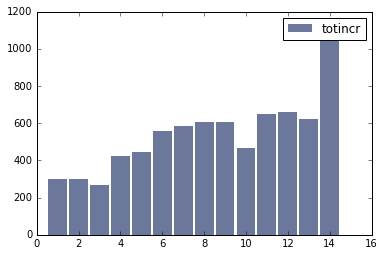

In [26]:
import thinkplot
thinkplot.Hist(income_hist, label='totincr')
thinkplot.Show()

Make a histogram of <tt>age_r</tt>, the respondent's age at the time of interview.

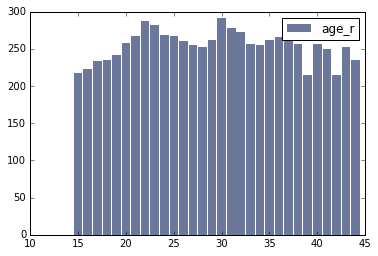

In [27]:
age_hist = thinkstats2.Hist(resp.age_r)
thinkplot.Hist(age_hist, label='age_r')
thinkplot.Show()

Make a histogram of <tt>numfmhh</tt>, the number of people in the respondent's household.

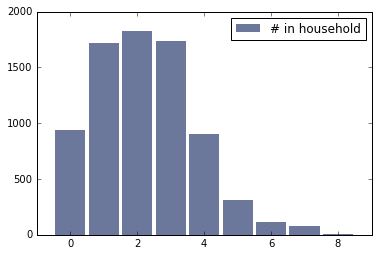

In [28]:
numfmhh_hist = thinkstats2.Hist(resp.numfmhh)
thinkplot.Hist(numfmhh_hist, label='# in household')
thinkplot.Show()

Make a histogram of <tt>parity</tt>, the number children the respondent has borne.  How would you describe this distribution?

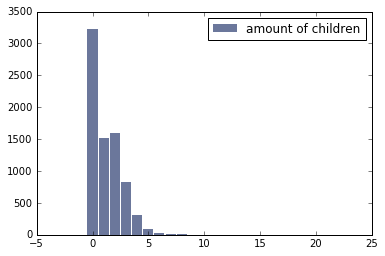

In [29]:
parity_hist = thinkstats2.Hist(resp.parity)
thinkplot.Hist(parity_hist, label='amount of children')
thinkplot.Show()

This shows that the largest group was that of individuals who did not have any children. Next, 2 children seemed most common, with 1 trailing behind. A sharp drop off shows that 3 or more children was less common.

Use Hist.Largest to find the largest values of <tt>parity</tt>.

In [30]:
largest = thinkstats2.Hist.Largest(parity_hist)
print largest

[(22, 1), (16, 1), (10, 3), (9, 2), (8, 8), (7, 15), (6, 29), (5, 95), (4, 309), (3, 828)]


Use <tt>totincr</tt> to select the respondents with the highest income.  Compute the distribution of <tt>parity</tt> for just the high income respondents.

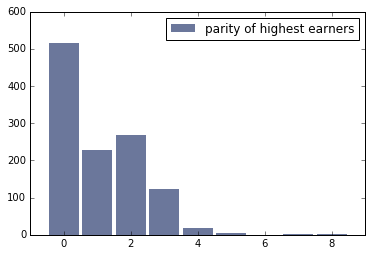

In [31]:
pricey_hist = thinkstats2.Hist(resp[resp.totincr == 14].parity)
thinkplot.Hist(pricey_hist, label='parity of highest earners')
thinkplot.Show()

Find the largest parities for high income respondents.

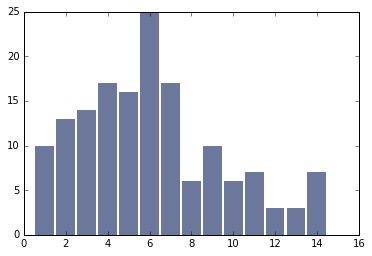

In [32]:
# I'm defining largest parities as higher than 5
highpar_hist = thinkstats2.Hist(resp[resp.parity >= 5].totincr)
thinkplot.Hist(highpar_hist, label='earnings for highest children count')

Compare the mean <tt>parity</tt> for high income respondents and others.

In [33]:
high = resp[resp.totincr >= 12]
others = resp[resp.totincr < 12]

print "high income", high.parity.mean(), ", others", others.parity.mean()

# meanpar_hist = thinkstats2.Hist(resp[resp.parity >= 5].totincr)
# meanpar_hist = meanpar_hist.mean()
# thinkplot.Hist(meanpar_hist, label='mean parity for income brackets')

high income 1.04547316673 , others 1.30661284121


Investigate any other variables that look interesting.

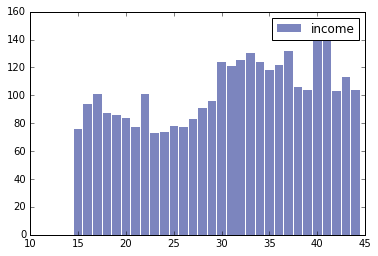

In [34]:
# investigating income > 10th group and age correlation
ageinc_hist = thinkstats2.Hist(resp[resp.totincr > 10].age_r)
thinkplot.Hist(ageinc_hist, label='income')
thinkplot.Show()

### Exercise 4

Using the variable totalwgt_lb, investigate whether first babies are lighter or heavier than others. Compute Cohen’s d to quantify the difference between the groups. How does it compare to the difference in pregnancy length? 

In [35]:
import nsfg
df = nsfg.ReadFemPreg()

With data imports out of the way, now we can actually look at baby weights and birth order.

In [36]:
live = df[df.outcome == 1]

first = live[live.birthord == 1]
others = live[live.birthord != 1]

print first.totalwgt_lb.mean(), ',', others.totalwgt_lb.mean()

7.20109443044 , 7.32585561497


In [37]:
from math import sqrt
from math import pow

diff = others.totalwgt_lb.mean() - first.totalwgt_lb.mean()
sd = sqrt((pow(first.totalwgt_lb.var(), 2) + pow(others.totalwgt_lb.var(), 2)) / 2)

cohen = diff / sd
print cohen

0.0629708817548
